# Pymaceuticals Inc.
---

### Analysis

-We can understand that mice treated with Capomulin live longer than mice treated with other medications (see figure 1), the data also displays that Capomulin, on average, has the beset tumor reductor. 

-The data also shows there was little to no difference in drug response between subjects of different sex (see Figure 2), both subject displaying the same tumor decrease, and all datapoints taken for Capomulin are within the expected range, with no outliers found in the data.

-It can be inferred that all the values obtained for Capomulin are within expectation, with no outliers shown in the data (see Figure 5.)   Study for mice I509 (Figure 6) also shows the progression of Capomulin, displaying how long it takes for Capomulin to start taking effect. 

-Lastly, we can determine that the average tumor volume and the weight of the mice are directly proportional, with a positive correlation of 0.84. 

-In conclusion, there are limitations for the data gathered, further studies on the beginning vs the end of the observations for all mice, would provide a more accurate progression of Capomulin. 

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(study_results,mouse_metadata, how = "left", on=["Mouse ID"])
# Display the data table for preview
data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
counts = data_df["Mouse ID"].nunique()
counts

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = data_df[data_df.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
                               
duplicates

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = data_df.loc[data_df["Mouse ID"] == "g989",:]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_2 = data_df.drop(duplicate_data.index)
data_2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
data_2["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

data_mean = data_2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
data_median = data_2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
data_variance = data_2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
data_std= data_2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
data_SEM = data_2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

data_regime = pd.DataFrame({"Mean Tumor Volume":data_mean,
                            "Median Tumor Volume":data_median,
                            "Tumor Volume Variance":data_variance,
                            "Tumor Volume Std. Dev.":data_std,
                            "Tumor Volume Std. Err.":data_SEM})
data_regime

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

data_agg = data_2.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})


data_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

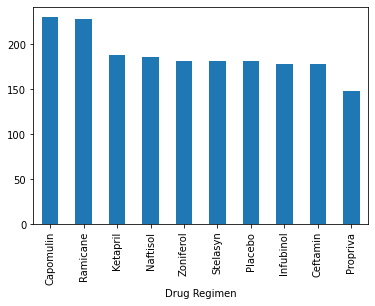

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
data_Regime = data_2.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending = False)
data_Regime.plot.bar(x=None, y=None,)

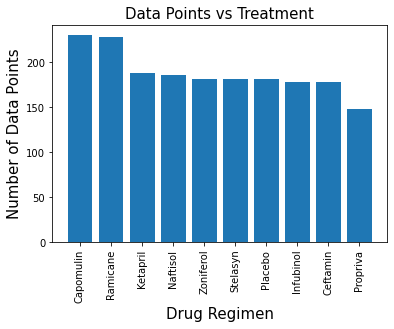

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(data_Regime.index.values ,data_Regime)
plt.xticks(rotation = 90)
plt.title('Data Points vs Treatment',fontsize=15)
plt.xlabel('Drug Regimen',fontsize=15, color='black')
plt.ylabel("Number of Data Points",fontsize=15, color='black')
plt.show()

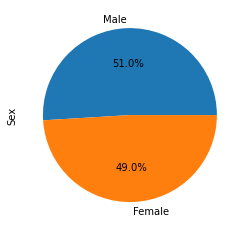

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
F_gender = data_2.loc[data_2["Sex"]=="Female"]["Mouse ID"].count()
M_gender = data_2.loc[data_2["Sex"]=="Male"]["Mouse ID"].count()
labels =["Male","Female"]
gender = pd.DataFrame({ "Gender":["Male","Female"],"Sex":[M_gender,F_gender]})
gender.set_index("Gender") 
gender.plot.pie(y="Sex", autopct='%1.1f%%',legend = False,labels=labels)
plt.show()

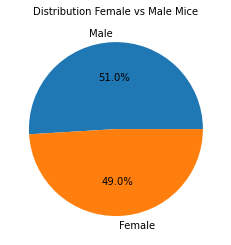

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y = [M_gender,F_gender]
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.title('Distribution Female vs Male Mice', fontsize=10)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
data_max = data_2.groupby(["Mouse ID","Drug Regimen"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
data_merge = pd.merge(data_max,data_2, on =["Mouse ID","Drug Regimen","Timepoint"])

Capomulin_data = data_merge.loc[data_merge["Drug Regimen"] =="Capomulin"]
Ramicane_data = data_merge.loc[data_merge["Drug Regimen"] =="Ramicane"]
Infubinol_data = data_merge.loc[data_merge["Drug Regimen"] =="Infubinol"]
Ceftamin_data = data_merge.loc[data_merge["Drug Regimen"] =="Ceftamin"]

data_merge

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,Infubinol,45,67.973419,2,Female,20,23
1,a251,Infubinol,45,65.525743,1,Female,21,25
2,a262,Placebo,45,70.717621,4,Female,17,29
3,a275,Ceftamin,45,62.999356,3,Female,20,28
4,a366,Stelasyn,30,63.440686,1,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,Propriva,10,48.710661,0,Female,12,26
244,z578,Ramicane,45,30.638696,0,Male,11,16
245,z581,Infubinol,45,62.754451,3,Female,24,25
246,z795,Naftisol,45,65.741070,3,Female,13,29


In [14]:
#merging tables into one 
table_1 = pd.merge(Capomulin_data,Ramicane_data, how = "outer",on =None)
table_2 = pd.merge(table_1,Infubinol_data, how = "outer",on =None)
Drug_table = pd.merge(table_2,Ceftamin_data, how = "outer",on =None)

Drug_table

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,b128,Capomulin,45,38.982878,2,Female,9,22
1,b742,Capomulin,45,38.939633,0,Male,7,21
2,f966,Capomulin,20,30.485985,0,Male,16,17
3,g288,Capomulin,45,37.074024,1,Male,3,19
4,g316,Capomulin,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
95,x226,Ceftamin,0,45.000000,0,Male,23,28
96,x581,Ceftamin,45,64.634949,3,Female,19,28
97,x822,Ceftamin,45,61.386660,3,Male,3,29
98,y769,Ceftamin,45,68.594745,4,Female,6,27


In [15]:
# Put treatments into a list (and later for plot labels)
treatments= Drug_table["Drug Regimen"].unique()


# Create empty list to fill with tumor vol data (for plotting)
Capomulin_list = data_merge.loc[data_merge["Drug Regimen"] =="Capomulin"]["Tumor Volume (mm3)"]
Ramicane_list = data_merge.loc[data_merge["Drug Regimen"] =="Ramicane"]["Tumor Volume (mm3)"]
Infubinol_list = data_merge.loc[data_merge["Drug Regimen"] =="Infubinol"]["Tumor Volume (mm3)"]
Ceftamin_list = data_merge.loc[data_merge["Drug Regimen"] =="Ceftamin"]["Tumor Volume (mm3)"]


# Calculate the IQR for Capomulin, Ramicane, Infubinol, Ceftamin and quantitatively determine if there are any potential outliers. 
inf_quart= Capomulin_data["Tumor Volume (mm3)"].quantile([0.25,.5,.75])
lowerq = inf_quart[0.25]
upperq= inf_quart[0.75]
IQR_Cap = upperq-lowerq
upper_bound_cap = upperq +(1.5* IQR_Cap)
lower_bounw_cap = lowerq -(1.5* IQR_Cap)
outlier_Cap=[]
for volume in Capomulin_list:
     if volume > upper_bound_cap or volume <  lower_bounw_cap:
        outlier_Cap.append(volume)

        
inf_quart= Ramicane_data["Tumor Volume (mm3)"].quantile([0.25,.5,.75])
lowerq = inf_quart[0.25]
upperq= inf_quart[0.75]
IQR_Ram =  upperq-lowerq
upper_bound_Ram = upperq +(1.5* IQR_Ram)
lower_bounw_Ram =lowerq -(1.5* IQR_Ram)
outlier_Ram = []
for volume in Ramicane_list:
     if volume > upper_bound_Ram or volume <  lower_bounw_Ram:
        outlier_Ram.append(volume)
        

inf_quart= Infubinol_data["Tumor Volume (mm3)"].quantile([0.25,.5,.75])
lowerq = inf_quart[0.25]
upperq= inf_quart[0.75]
IQR_Inf =  upperq-lowerq
upper_bound_Inf = upperq +(1.5* IQR_Inf)
lower_bounw_Inf =lowerq -(1.5* IQR_Inf)
outlier_Inf = []
for volume in Infubinol_list:
     if volume > upper_bound_Inf or volume <  lower_bounw_Inf:
        outlier_Inf.append(volume)

        
inf_quart= Ceftamin_data["Tumor Volume (mm3)"].quantile([0.25,.5,.75])
lowerq = inf_quart[0.25]
upperq= inf_quart[0.75]
IQR_Cef = upperq-lowerq
upper_bound_Cef = upperq +(1.5* IQR_Cef)
lower_bounw_Cef = lowerq - (1.5* IQR_Cef)
outlier_Cef =[]
for volume in Ceftamin_list:
     if volume > upper_bound_Cef or volume <  lower_bounw_Cef:
        outlier_Cef.append(volume)

print("potential outliers for Capomulin", outlier_Cap)
print("potential outliers for Ramicane",outlier_Ram)
print("potential outliers for Infubinol",outlier_Inf)
print("potential outliers for Ceftamin",outlier_Cef)

potential outliers for Capomulin []
potential outliers for Ramicane []
potential outliers for Infubinol [36.321345799999996]
potential outliers for Ceftamin []


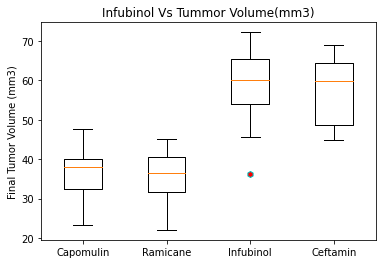

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
dot = dict(markerfacecolor ="r", marker ="h", markeredgecolor="c")
fig1,ax1 = plt.subplots()
ax1.set_title('Infubinol Vs Tummor Volume(mm3)')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot([Capomulin_list,Ramicane_list,Infubinol_list,Ceftamin_list],labels=treatments,flierprops=dot)

plt.show()

## Line and Scatter Plots

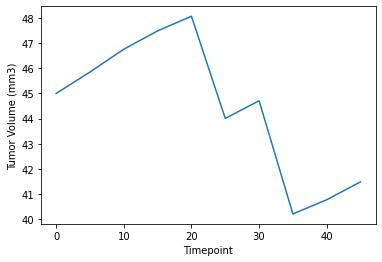

In [17]:
# Generate a line plot of tumor volume vs. time point for mouse l509 treated with Capomulin
tumor_plot = data_2.loc[data_2["Drug Regimen"] =="Capomulin"][["Mouse ID","Tumor Volume (mm3)","Timepoint"]]
data_l509 = tumor_plot.loc[tumor_plot["Mouse ID"]=="l509"]
data_l509.plot.line(x="Timepoint", y="Tumor Volume (mm3)",legend = False).set_ylabel("Tumor Volume (mm3)")
plt.show()

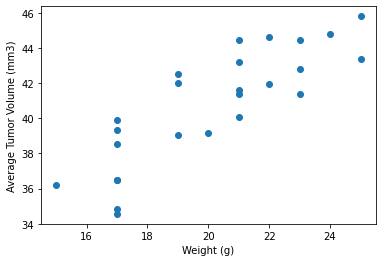

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_frame = data_2.loc[data_2["Drug Regimen"] =="Capomulin"]
tumor_average = Capomulin_frame.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
weight_average =Capomulin_frame.groupby(["Mouse ID"])["Weight (g)"].mean() 
plt.scatter(weight_average,tumor_average)
plt.xlabel("Weight (g)")
plt.ylabel ("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


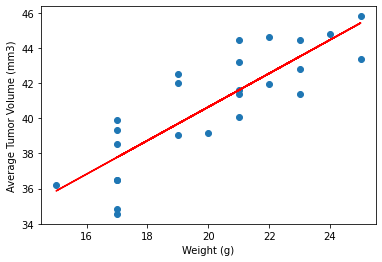

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(weight_average,tumor_average)[0],2)}")

x_values = weight_average
y_values = tumor_average
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()